# Data Viz Lab 03: Plotting in Python

In [2]:
%matplotlib inline
# allows the output of Matplotlib plots to be displayed directly in the notebook interface,
# rather than in a separate window or as a pop-up.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Bar Plots

**Given dataset "tips.csv", use seaborn to plot horizontal bar chart of the average tip percentages on each
day. To calculate tip percentage, use the formula: tip percentage = tip / (total bill - tip).
Now, customize it to show average tip percetages of different time (Lunch and Dinner) on each day.**

In [9]:

# To Do

# with data that requires aggregation or summarization before making a plot,
# using the seaborn package can make things much simpler

# load data
tips = pd.read_csv('tips.csv')

# create a new column for tip percentage
tips['tip_percentage'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_percentage
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


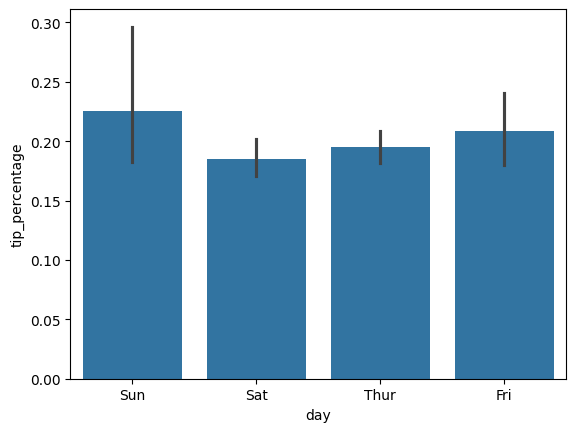

In [10]:
sns.barplot(x='day', y='tip_percentage', data=tips)
plt.show()

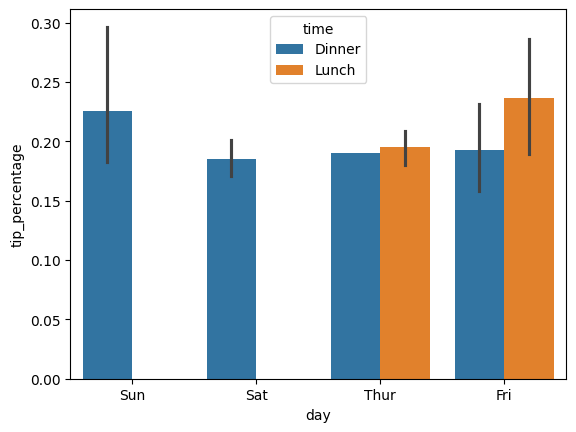

In [11]:
# Create a bar plot of the average tip percentage of different time (Lunch and Dinner) on each day.
sns.barplot(x='day', y='tip_percentage', hue='time', data=tips)
plt.show()

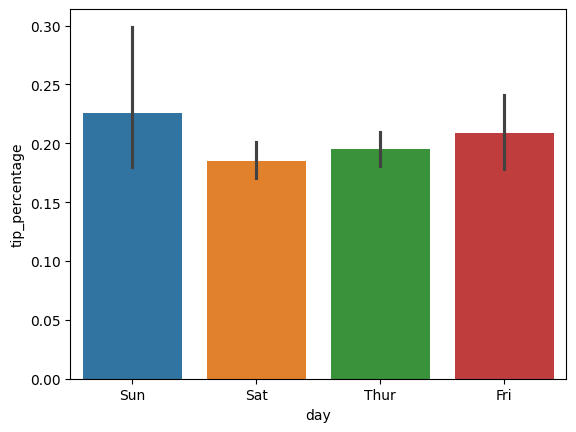

In [12]:
# To Do


# plotting function in seaborn take a data argument, which can be a pandas DataFrame.
# the other arguments refer to column names
# because there are multiple observations for each value in the day, the bars are the average value of tip_pct
# the black lines drawn on the bars represent the 95% confidence interval

sns.barplot(x='day', y='tip_percentage', hue='day', data=tips)
plt.show()

## Histograms and Density Plots

**With the same dataset above, plot a histogram and a density plot for the tip percentage. What are the
differences between these two plots? Can you plot these two graphs on the same plot?**

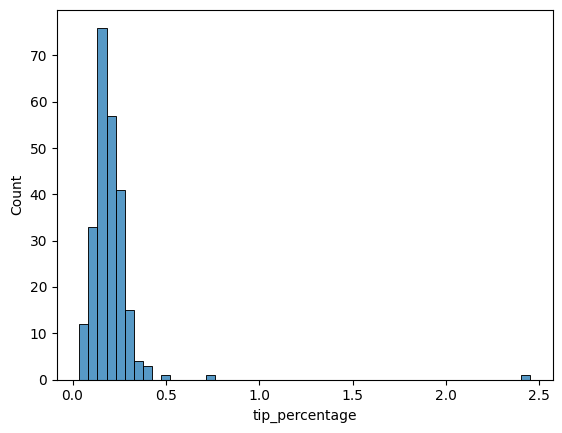

In [13]:
# To Do -> Histogram

# create another column tips["tip_pct"] = tips["tip"]/(tips["total_bill"] - tips["tip"])

# a histogram is a kind of bar plot that gives a discretized display of value frequency
sns.histplot(tips['tip_percentage'], bins=50)
plt.show()

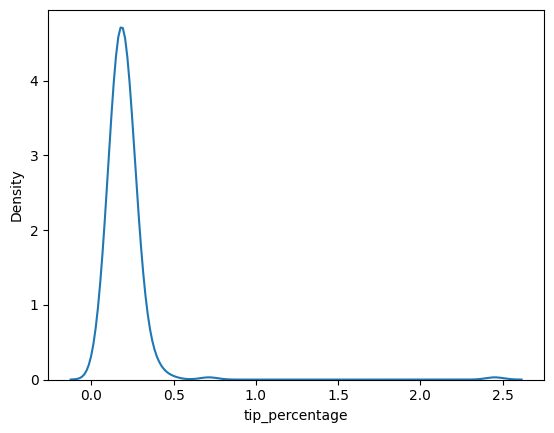

In [14]:
# Density Plot
sns.kdeplot(tips['tip_percentage'])
plt.show()

# Explain
# The density plot is a smoothed version of the histogram

# Density graph can be used to visualize before we decide to delete the missing values
# if the curve is not changed much before and after deleting, we can delete the missing values.

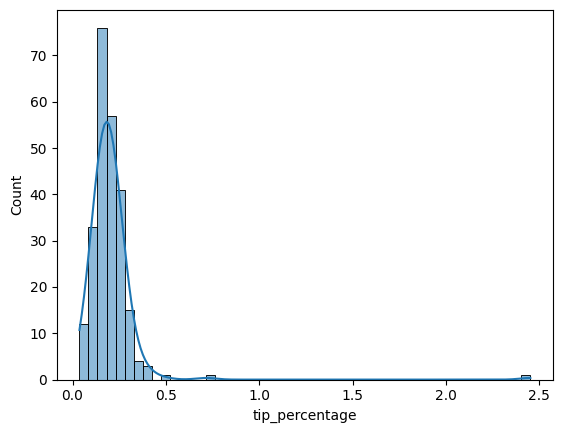

In [15]:
# To Do -> use previous dataset or generate any new dataset to put the two graphs together
# Put the histogram and density plot together

sns.histplot(tips['tip_percentage'], bins=50, kde=True)
plt.show()

## Scatter or Point Plots

**Given dataset "macrodata.csv", use seaborn to plot the scatter plot of changes in log(m1) compared to
changes in log(unemp).
Now, create a pairplot of changes in log of four features which are cpi, m1, tbilrate, and enemp.**

In [16]:
# To Do 

# load data -> select few features ["cpi", "m1", "tbilrate", "unemp"] -> Log Transformation and Differencing -> drop na -> view data
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
print(data.head())
# log transformation and differencing, drop na
# np.log() -> natural logarithm => log base e.
# Why? -> to convert stationary data to non-stationary data because the data 
# is time series data and the data is non-stationary.

# Stationary data means that its mean and variance are constant or not much change over time.
data = np.log(data).diff().dropna()
print(data.head())

     cpi     m1  tbilrate  unemp
0  28.98  139.7      2.82    5.8
1  29.15  141.7      3.08    5.1
2  29.35  140.5      3.82    5.3
3  29.37  140.0      4.33    5.6
4  29.54  139.6      3.50    5.2
        cpi        m1  tbilrate     unemp
1  0.005849  0.014215  0.088193 -0.128617
2  0.006838 -0.008505  0.215321  0.038466
3  0.000681 -0.003565  0.125317  0.055060
4  0.005772 -0.002861 -0.212805 -0.074108
5  0.000338  0.004289 -0.266946  0.000000


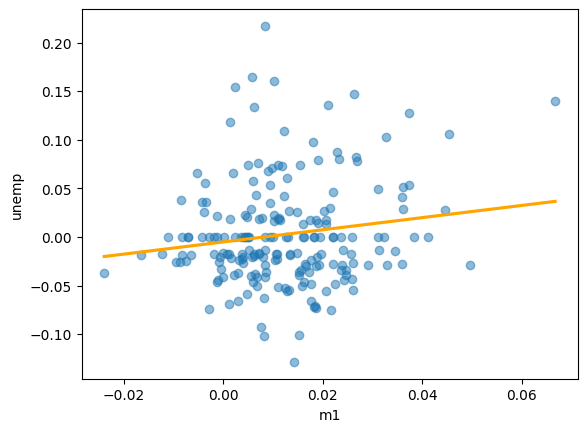

In [18]:
# To Do

# Plot the scatter plot using regplot method in seaborn 
sns.regplot(data=data, x='m1', y='unemp', ci=None, scatter_kws={'alpha':0.5}, line_kws={'color':'orange'})
plt.show()

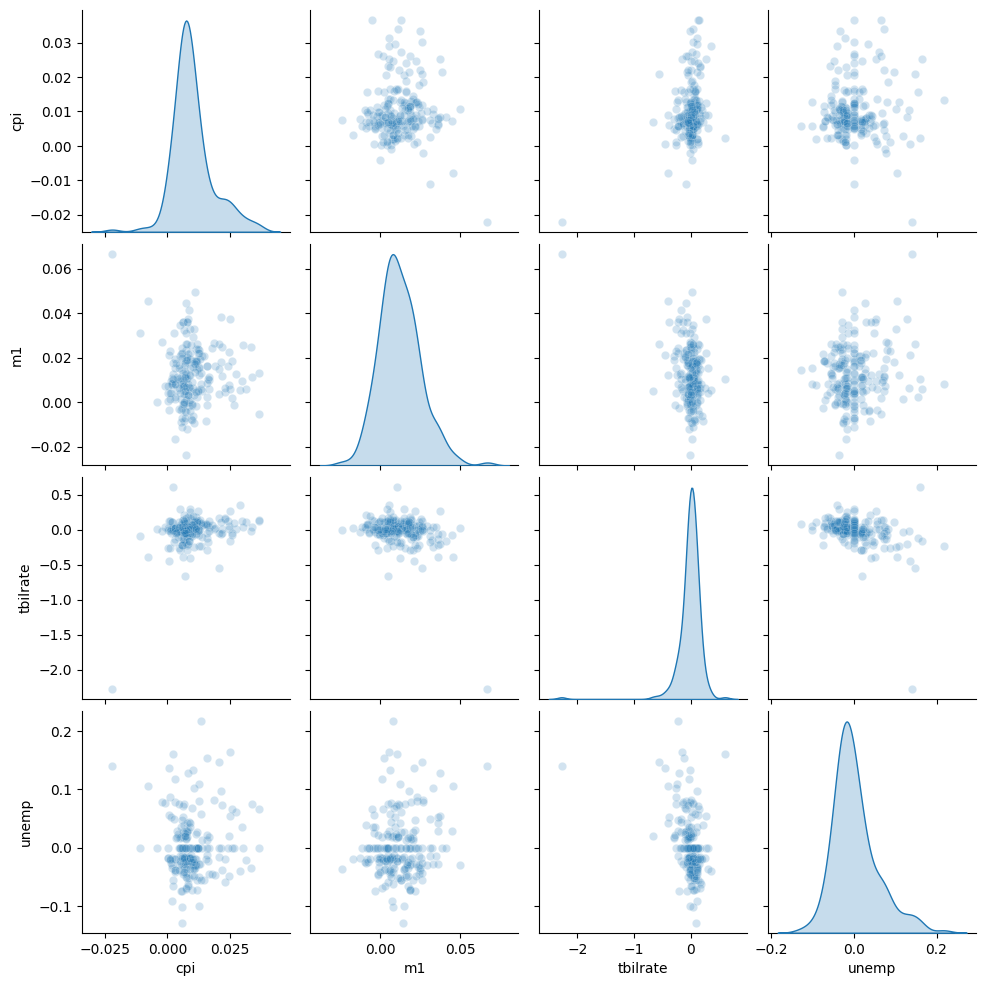

In [21]:
# To Do

# draw pairplot using pairplot function in seaborn
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.2})
plt.show()

## Heatmap of Correlations

In [20]:
# To Do

print(tips['total_bill'].info())

# Compute headmap of correlations from tips dataset
# Compute the correlation matrix
# corr = tips.corr([['total_bill', 'tip', 'size', 'tip_percentage']])
# print(corr)

# # Draw a heatmap with the numeric values in each cell
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.show()

<class 'pandas.core.series.Series'>
RangeIndex: 244 entries, 0 to 243
Series name: total_bill
Non-Null Count  Dtype  
--------------  -----  
244 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB
None


## Facet Grids and Categorical Data

**With the tip dataset above, plot two vertical bar charts of the average tip percentages on each day, one for
smoker and the other one for non-smoker. Both graphs should be in the same row.
Now, plot similar bar charts for different smokers and times.**

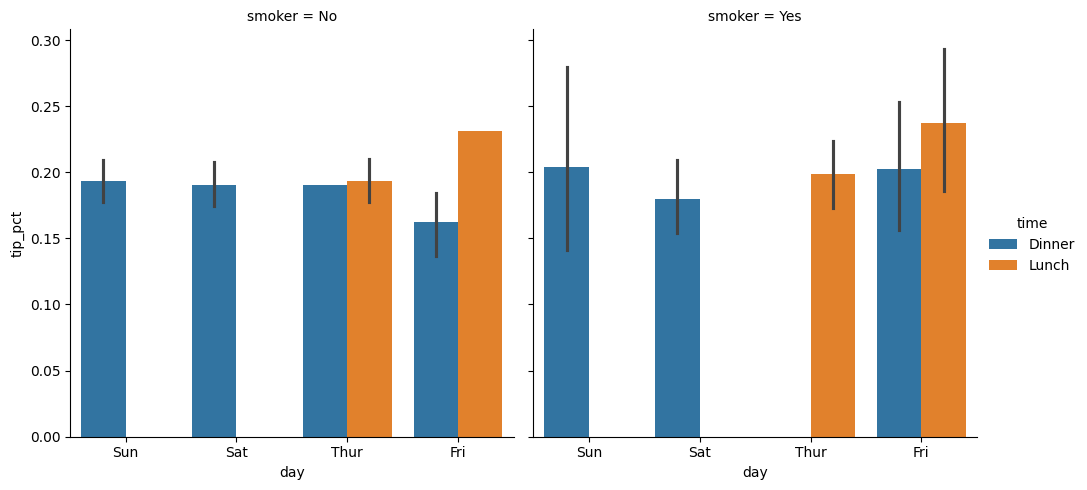

In [ ]:
# To Do

# Create a Catplot

sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct <1])

In [13]:
# To Do

# # Instead of grouping by "time" by different bar colors within a facet, we can also
# expand the facet grid by adding one row per time value:

## Plotly - Interactive Visualizations

In [4]:
import plotly.express as px

In [7]:
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [10, 20, 15, 25]
})
print(data)


  Category  Values
0        A      10
1        B      20
2        C      15
3        D      25


In [8]:
# To Do

# Interactive Plot with Plotly
fig = px.bar(data, x='Category', y='Values', title='Interactive Bar Chart')
fig.show()

In [5]:
# To Do
# Interactive Scatter Plot using tips datasets
tips = pd.read_csv('tips.csv')
fig = px.scatter(tips, x='total_bill', y='tip', color='day', title='Interactive Scatter Plot')
fig.show()